# Roche Stock Analysis

## Goal

I want to try to analyze whether or not it would be good to invest in Roche, a Swiss multinational healthcare/pharmaceutical company.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
roshe_prices = yf.download('RHHBY', period='max')
#roshe_prices.head()
roshe_prices

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2003-08-20  10.043750  10.043750  10.043750  10.043750   5.392676        0
2003-08-21   9.937500  10.000000   9.875000   9.937500   5.335629   105600
2003-08-22   9.900000   9.926250   9.831250   9.900000   5.315495    48800
2003-08-25   9.850000   9.875000   9.812500   9.850000   5.288647   500000
2003-08-26   9.806250   9.806250   9.687500   9.806250   5.265157   307200
...               ...        ...        ...        ...        ...      ...
2024-09-05  40.840000  40.880001  40.570000  40.639999  40.639999  1738100
2024-09-06  40.900002  41.020000  40.369999  40.490002  40.490002  1645500
2024-09-09  38.820000  39.419998  38.660000  39.110001  39.110001  3107400
2024-09-10  39.639999  39.750000  39.369999  39.720001  39.720001  1590800
2024-09-11  39.799999  39.799999  37.049999  37.330002  37.330002  1635066

[5301 rows x 6 columns]

## Exploratory Data Analysis

* Attempt at making observations about Roche's stock
* Find relationships between Roche and microeconomic/macroeconomic factors

In [3]:
# Generating descriptive statistics about each feature of the dataset
descrip_stats = roshe_prices.describe()
descrip_stats

Open         High          Low        Close    Adj Close  \
count  5301.000000  5301.000000  5301.000000  5301.000000  5301.000000   
mean     28.423422    28.600913    28.247275    28.431259    21.648914   
std       9.943867     9.994779     9.899802     9.941060    10.989257   
min       9.531250     9.606250     7.908750     9.531250     5.117506   
25%      20.170000    20.330000    20.000000    20.160000    12.001337   
50%      29.879999    30.080000    29.750000    29.950001    22.795727   
75%      35.660000    35.860001    35.480000    35.660000    28.733025   
max      53.549999    53.860001    53.200001    53.439999    49.429855   

             Volume  
count  5.301000e+03  
mean   1.175253e+06  
std    1.223631e+06  
min    0.000000e+00  
25%    4.780000e+05  
50%    8.054000e+05  
75%    1.418200e+06  
max    1.859370e+07

In [4]:
# Calculating the spread/range for each feature
ranges = descrip_stats.loc['max'] - descrip_stats.loc['min']
ranges.columns = ['Range']
ranges

Open         4.401875e+01
High         4.425375e+01
Low          4.529125e+01
Close        4.390875e+01
Adj Close    4.431235e+01
Volume       1.859370e+07
dtype: float64

In [5]:
# Calculating the variance for each column
variance = roshe_prices.var()
print("Variance for each feature: ")
print(variance)

print()
# Calculating the standard deviation for each column
standard_dev = roshe_prices.std()
print("Standard deviation for each feature: ")
print(standard_dev)


Variance for each feature: 
Open         9.888050e+01
High         9.989560e+01
Low          9.800608e+01
Close        9.882468e+01
Adj Close    1.207638e+02
Volume       1.497272e+12
dtype: float64

Standard deviation for each feature: 
Open         9.943867e+00
High         9.994779e+00
Low          9.899802e+00
Close        9.941060e+00
Adj Close    1.098926e+01
Volume       1.223631e+06
dtype: float64


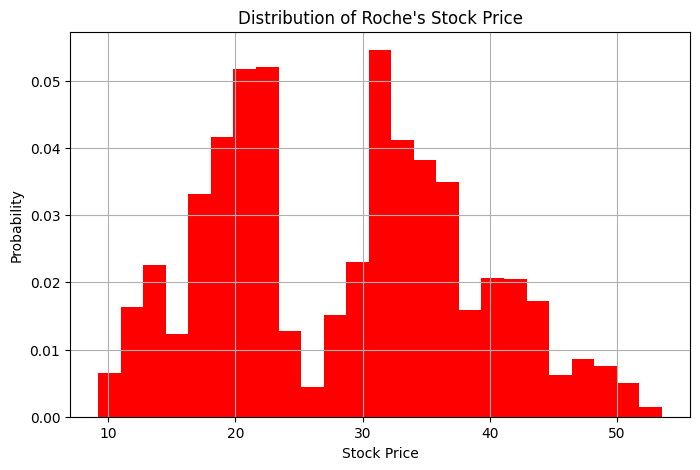

In [6]:
import matplotlib.pyplot as plt

# Observing the general distribution of stock prices from 2003-Today
plt.figure(figsize=(8,5))

# Calculate the avg price of Roche's stock on a given day
avg_price = (roshe_prices["High"] + roshe_prices["Low"]) / 2

# Plot a histogram of the distribution of Roche's stock price
plt.hist(avg_price, bins=25, density=True, color='r')

plt.title("Distribution of Roche's Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Probability")

# Displaying the histogram with grid lines
plt.grid(True)
plt.show()


An overall upward trend in Roche's stock from 2003 until today indicates that the value of its stock has generally increased over time, which is further visualized in the "Roche Avg Stock Price Over Time" plot I created below

Microeconomic / Macroeconomic factors:

*   The increase in the price of Roche's stock is reflective of the company's strong earnings, profitability, market share, product success (development and sale), and strong financial performance

*   Based on the "Roche Avg Stock Price Over Time" plot, it can be observed that Roche's stock has had a gradual increase in the price of its shares with occasional peaks and dips in its price. Specifically, it can be observed that there are patterns with Roche's stock price, with significant rises in Roche's stock leading to declines and then recoveries

*   Given previous patterns of sharp rise, decline, and recovery, Roche's stock currently appears to be in a period of decline after a drastic increase in the stocks value from 2020-2022, which should be followed by recovery and a rise in Roche's stock

*  Roche's drastic increase in the stocks value from 2020-2022 was likely a result of the development of new drugs (Perjeta, Kadcyla, Alecensa, Tecentriq are just to name a few) and the COVID pandemic (which invovled the sale of testing kits and products)

*  On the other hand, the decline in its stock from mid 2022 and 2023 can be attributed to failed drug tests (Gantenerumab, Tiragolumab, Tecentriq & Cabometyx) and a sharp decline in COVID product sales

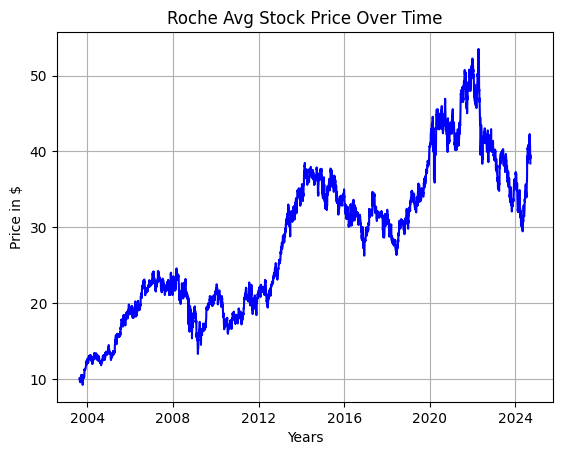

In [7]:
# Plot the price of the stock over time
plt.plot(roshe_prices.index, avg_price, color="blue", linestyle="-")
#plt.plot(roshe_prices.index, roshe_prices["Low"], color="red", linestyle="--")

# Adding a title as well as X and Y labels
plt.title('Roche Avg Stock Price Over Time')
plt.xlabel('Years')
plt.ylabel('Price in $')

# Display the plot
plt.grid(True)
plt.show()

The overall increase over time of the volume (trading activity) of the stock indicates that there has been consistent increase in interest in Roche's stock and that is has high liquidity, which is further visualized below with the "Roche Stock Volume Over Time" plot I created below, which utilized a 100-day moving average to visualize the change in Volume

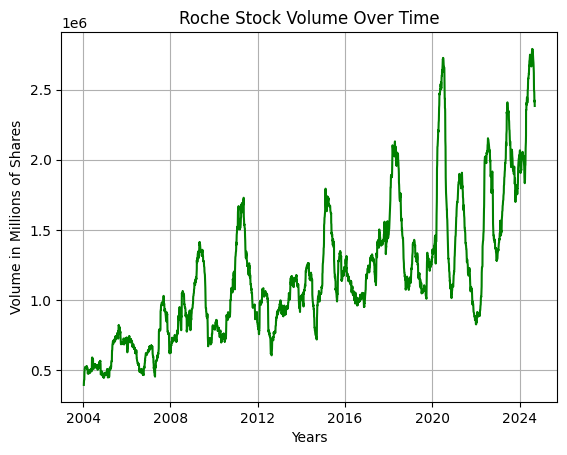

In [8]:
# Volume Analysis

# Calculate a 100-day moving average for the volume of the stock
moving_avg = roshe_prices['Volume'].rolling(window=100).mean()

# Plot the volume of the stock over time
plt.plot(moving_avg, color="green", linestyle="-")
#plt.plot(roshe_prices.index, roshe_prices['Volume'], color="green", linestyle="-")

# adding a title as well as X and Y labels
plt.title('Roche Stock Volume Over Time')
plt.xlabel('Years')
plt.ylabel('Volume in Millions of Shares')

# Display the plot
plt.grid(True)
plt.show()

The overall High to Low diference of Roche's stock can be seen as low between 2003-Present, with the exception of an early period in 2020. A stock with small difference indicates that it does not experience drastic change and therefore not very risky. The activity of the difference between the daily High and Low price for Roche's stock can be observed by the plot I created below

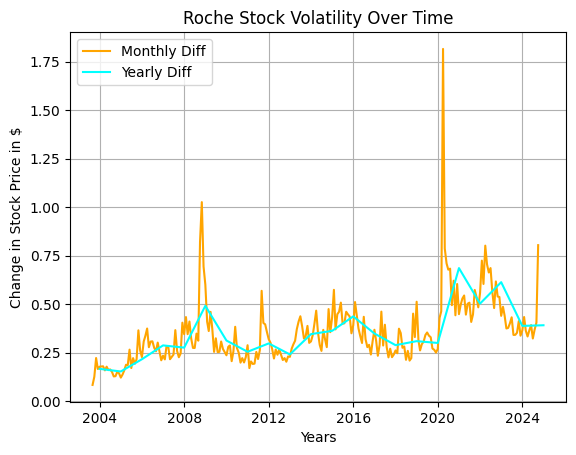

In [9]:
# Calculate the avg monthly difference between High and Low stock prices, which represents movement of the stock
monthly_avg_diff = roshe_prices["High"].resample("ME").mean() - roshe_prices["Low"].resample("ME").mean()
# Calculate the avg yearly difference between High and Low stock prices, which represents the movement of the stock
yearly_avg_diff = roshe_prices["High"].resample("YE").mean() - roshe_prices["Low"].resample("YE").mean()

# Plot the volume of the stock over time
plt.plot(monthly_avg_diff, color="Orange", linestyle="-", label="Monthly Diff")
plt.plot(yearly_avg_diff, color='Cyan', linestyle="-", label="Yearly Diff")

# adding a title as well as X and Y labels
plt.title('Roche Stock Volatility Over Time')
plt.xlabel('Years')
plt.ylabel('Change in Stock Price in $')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

Microeconomic Factors:
*   Roche has seen stable increases in Earnings and Revenue, which reflects the steady increase in Roche's stock price
  * Roche's has experienced steady growth and increases in annual revenue from 2010-2022, with 2015 and 2022 being the only exceptions, this reflect the rises in its stock price
       * https://www.macrotrends.net/stocks/charts/RHHBY/roche-holding-ag/revenue    
  * Roche is currently ranked 1st for publicly traded pharmaceutical compaines by earnings
       * https://companiesmarketcap.com/pharmaceuticals/most-profitable-pharmaceutical-companies/
  
  * Roche acheived a sales growth of 1% for 2023, which is impressive given the drastic drop in Covid sales (4.3 billion francs), which was one of Roche's biggest sources of income
       * https://money.usnews.com/investing/news/articles/2024-02-01/roche-forecasts-return-to-growth-in-2024-as-it-overcomes-drop-in-covid-sales
       * https://www.roche.com/investors/annualreport23
       

*   Product Pipeline and R&D
  * Failed drug tests (Gantenerumab, Tiragolumab, Tecentriq & Cabometyx) and a sharp decline in Covid-19 test sales were likely major factors in the decline in Roche's stock from mid 2022 and 2023
  * Successful approvals for Roche's drugs (such as Gazyva and Alecensa in 2013 and 2014) as well as periods of intense product launch, such as the launch of 6 products between 2010-2014 contributed to increases in Roche's stock price
     * https://www.bloomberg.com/news/articles/2013-11-01/roche-wins-approval-for-first-breakthrough-therapy-drug

  * Roche has many new drugs currently in its development pipeline


*   Acquistitions and Mergers
  * Roche's acquisitions of Venta Medical Systems for 3.4 billion in January 2008 and acquistion of Genentech for $46.8 billion in March 2009 likely contributed to a recovery in Roche's stock price
  * Roche's recent acquisition of Televant Holdings grants them ownership and rights to the RVT-3101 drug (a therapy under development for inflammatory bowel disease), with aims to start global phase 3 trials, this will likely increase Roche's stock performance if the drug is able to have success in its trials and if it is released in the future
     * https://www.cnbc.com/2023/10/23/roche-agrees-7point1-billion-deal-to-buy-telavant-holdings.html

Macroeconomic Factors:

*   Global Healthcare spending
   * The healthcare and pharmaceutical industry is growing and spending has increased, with pharma revenues worldwide totaling 1.48 trillion US dollars in 2022 (https://www.statista.com/topics/1764/global-pharmaceutical-industry/#topicOverview)
   * As of 2023, Roche has a market cap of $222.4 Billion which ranks 6th among the world's largest Pharmaceutical companies (https://www.visualcapitalist.com/cp/worlds-50-largest-pharmaceutical-companies/)
   * The number of people with private health insurance is down .11% over the last five years
   * Industry is returning to normal post-COVID, with the healthcare and pharmaceutical industry now supported by more government assistance, grants, and purchases as population health is now more of a concern than ever

*   Policy change
   * For drug companies, R&D is a large capital expenditure, meaning high interest rates makes borrowing expensive
   * The pharmaceutical industry is heavily regulated, with recent relevant legislation including:
    * The CREATES Act reduces prices and increases competitiveness of generic drugs
    * Prescription Drug User Fee Act takes a fee from pharmaceutical companies like Roshe to review the marketing applications used by companies

## Feature Engineering

* Adding features to be used for my machine learning model

In [10]:
# Add a Date column, will be needed in model
roshe_prices["Date"] = roshe_prices.index

# Create a column for the average daily stock price, as it cit useful to have one price for each day and for calculations
roshe_prices["Average Price"] = avg_price

# Create a column for the daily difference in High and Low stock price,
# this helps reduce dimensionality as it helps combine the High and Low columns under one column
roshe_prices['Price Range'] = roshe_prices["High"] - roshe_prices["Low"]

# Create a column for the 100-day moving average for the volume of the stock, which helps observe interest in and liquidity of the stock
roshe_prices["100-day moving avg"] = moving_avg

# Create a column for Simple returns, which measure the percentage change in price from one day to the next
# Simple returns helps tell you the magnitude of the change in Roche's stock price
roshe_prices["Simple Returns"] = roshe_prices["Close"].pct_change()

# Create a column for logrithmic returns, which is another measurement for the percentage change in price from one day to the next
# Log returns is very useful when dealing with multiple compounding periods
roshe_prices["Log Returns"] = np.log(roshe_prices["Close"] / roshe_prices["Close"].shift(1))

roshe_prices

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2003-08-20  10.043750  10.043750  10.043750  10.043750   5.392676        0   
2003-08-21   9.937500  10.000000   9.875000   9.937500   5.335629   105600   
2003-08-22   9.900000   9.926250   9.831250   9.900000   5.315495    48800   
2003-08-25   9.850000   9.875000   9.812500   9.850000   5.288647   500000   
2003-08-26   9.806250   9.806250   9.687500   9.806250   5.265157   307200   
...               ...        ...        ...        ...        ...      ...   
2024-09-05  40.840000  40.880001  40.570000  40.639999  40.639999  1738100   
2024-09-06  40.900002  41.020000  40.369999  40.490002  40.490002  1645500   
2024-09-09  38.820000  39.419998  38.660000  39.110001  39.110001  3107400   
2024-09-10  39.639999  39.750000  39.369999  39.720001  39.720001  1590800   
2024-09-11  39.799999  39.799999  37.049999  37.330002  37.330002  1635066   

                 Date  Average Price  Price Range  100-day moving avg  \
Date                                                                    
2003-08-20 2003-08-20      10.043750     0.000000                 NaN   
2003-08-21 2003-08-21       9.937500     0.125000                 NaN   
2003-08-22 2003-08-22       9.878750     0.095000                 NaN   
2003-08-25 2003-08-25       9.843750     0.062500                 NaN   
2003-08-26 2003-08-26       9.746875     0.118750                 NaN   
...               ...            ...          ...                 ...   
2024-09-05 2024-09-05      40.725000     0.310001          2443014.00   
2024-09-06 2024-09-06      40.695000     0.650002          2413099.00   
2024-09-09 2024-09-09      39.039999     0.759998          2421617.00   
2024-09-10 2024-09-10      39.559999     0.380001          2387035.00   
2024-09-11 2024-09-11      38.424999     2.750000          2382608.66   

            Simple Returns  Log Returns  
Date                                     
2003-08-20             NaN          NaN  
2003-08-21       -0.010579    -0.010635  
2003-08-22       -0.003774    -0.003781  
2003-08-25       -0.005050    -0.005063  
2003-08-26       -0.004442    -0.004452  
...                    ...          ...  
2024-09-05       -0.007570    -0.007599  
2024-09-06       -0.003691    -0.003698  
2024-09-09       -0.034083    -0.034677  
2024-09-10        0.015597     0.015477  
2024-09-11       -0.060171    -0.062058  

[5301 rows x 12 columns]

In [11]:
# Creating and preparing the dataframe to use for my predictive model
roshe_model = pd.DataFrame(roshe_prices, columns=['Date', 'Close'])
roshe_model.reset_index(drop=True, inplace=True)
roshe_model['Index'] = roshe_model.index

roshe_model

Date      Close  Index
0    2003-08-20  10.043750      0
1    2003-08-21   9.937500      1
2    2003-08-22   9.900000      2
3    2003-08-25   9.850000      3
4    2003-08-26   9.806250      4
...         ...        ...    ...
5296 2024-09-05  40.639999   5296
5297 2024-09-06  40.490002   5297
5298 2024-09-09  39.110001   5298
5299 2024-09-10  39.720001   5299
5300 2024-09-11  37.330002   5300

[5301 rows x 3 columns]

## Predictive Modeling

* Using an OLS regression model for prediction and observing model performance against real results


In [12]:
# Use the formula in stats models

import statsmodels.api as sm

ols = sm.OLS(roshe_model.Close, sm.add_constant(roshe_model.index)).fit()
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                 1.843e+04
Date:                Wed, 11 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:37:52   Log-Likelihood:                -15722.
No. Observations:                5301   AIC:                         3.145e+04
Df Residuals:                    5299   BIC:                         3.146e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2608      0.129    102.770      0.0

In [13]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

# Create LinearRegression instance
model = LinearRegression()
# Fit linear model using the train data set
model.fit(roshe_model[['Index']], roshe_model[['Close']])

LinearRegression()

In [14]:
# Add new columns for predictions to roshe_model
roshe_model['Prediction'] = model.predict(roshe_model[['Index']])
roshe_model

Date      Close  Index  Prediction
0    2003-08-20  10.043750      0   13.260830
1    2003-08-21   9.937500      1   13.266554
2    2003-08-22   9.900000      2   13.272279
3    2003-08-25   9.850000      3   13.278004
4    2003-08-26   9.806250      4   13.283728
...         ...        ...    ...         ...
5296 2024-09-05  40.639999   5296   43.578790
5297 2024-09-06  40.490002   5297   43.584515
5298 2024-09-09  39.110001   5298   43.590240
5299 2024-09-10  39.720001   5299   43.595964
5300 2024-09-11  37.330002   5300   43.601689

[5301 rows x 4 columns]

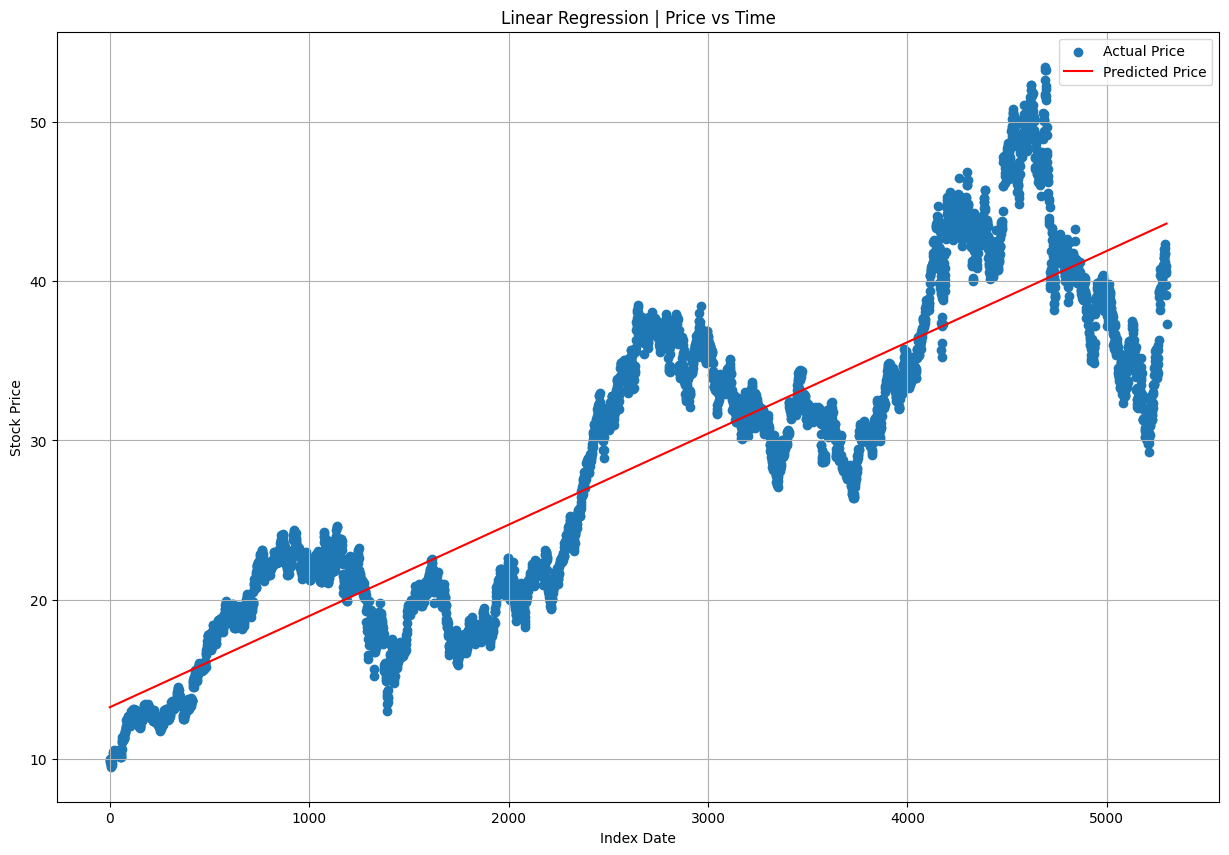

In [15]:
# Create predictive model figure
plt.figure(1, figsize=(15,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(roshe_model['Index'], roshe_model['Close'], label='Actual Price')
plt.plot(roshe_model['Index'], roshe_model['Prediction'], color='r', label='Predicted Price')
plt.xlabel('Index Date')
plt.ylabel('Stock Price')
plt.legend()

plt.grid(True)
plt.show()

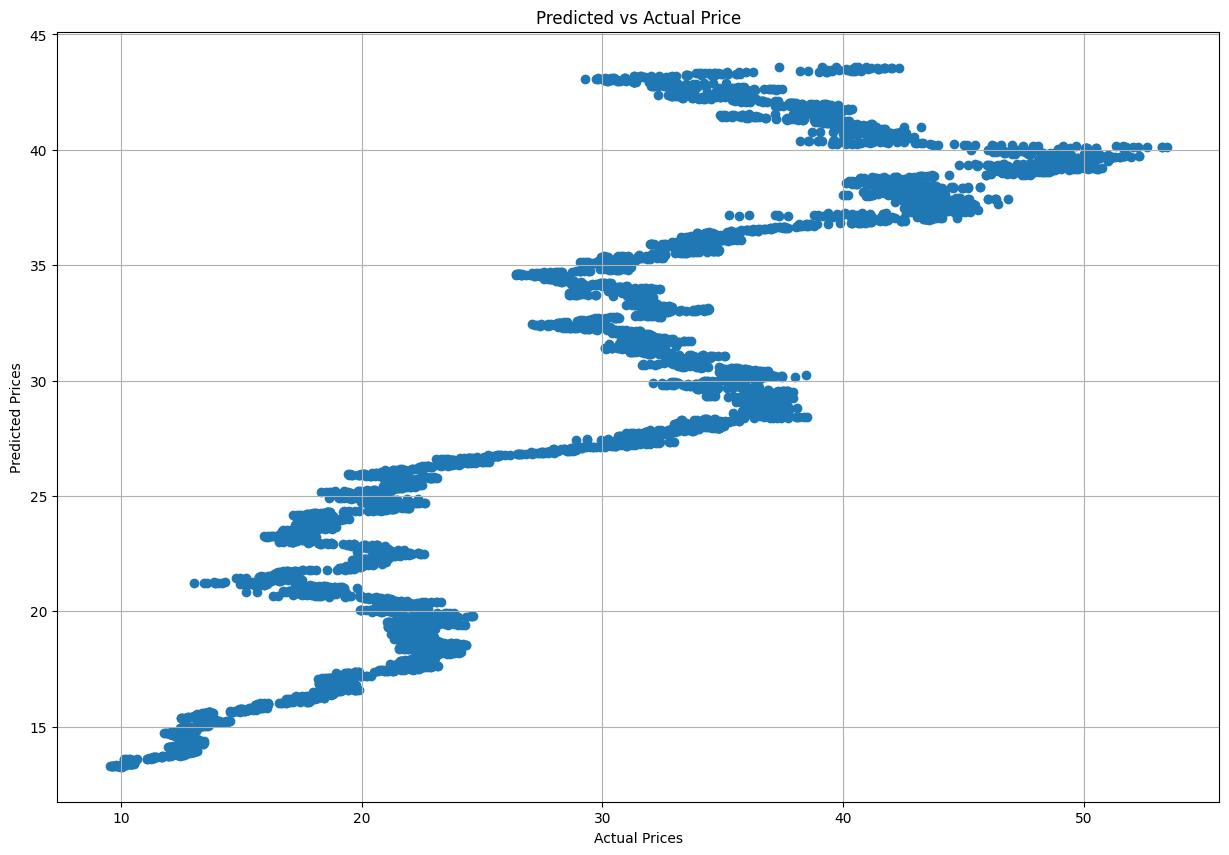

In [16]:
# Plot predicted vs actual prices
plt.figure(1, figsize=(15,10))
plt.scatter(roshe_model['Close'], roshe_model['Prediction'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Price')

plt.grid(True)
plt.show()

Accuracy of my Predictive Model - Coefficient of determination
* The following calculations show that my predictive model accounts for around 80% of the variation in Roche's stock price

In [17]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics
print('R2: ', metrics.r2_score(roshe_model['Close'], roshe_model['Prediction']))

R2:  0.776702821941764


In [18]:
from sklearn.metrics import explained_variance_score
explained_variance_score(roshe_model['Close'], roshe_model['Prediction'])

0.776702821941764

I utilized a Linear Regression model to predict Roche's stock.

Pros:
* The model I created is very simple, as the only features that were utilized was the stock's closing price and date (Index date)
* Linear regression models are easy to understand and are not computationally expensive

Cons:
* Stock price fluctation and volatility does not often follow linear relationship between the features in the dataset and stock price
* A linear regression model does not take into account how Roche's stock will be influenced by macroeconomic factors and market conditions
* Underfitting exists, as my model is too simple to learn the underlying structure of the dataset and stock price movement

## Recommendation


I recommend a **BUY** for Roche Holdings, because I beleive its stock is currently undervalued and has the potential and ability to appreciate.

Roche is a leader in the pharmaceutical industry with a 6% market share (ranked 2nd). The pharmaceutical industry brought in 1.48 trillion U.S. dollars in 2022 and is projected to grow 6.19% in the next 5 years (2024-2028). Roche has a strong brand name within the industry with control of many companies such as Genentech, Chugai Parmaceuticals, Ventana, and Foundation Medicine.

Roche's has maintained strong financial health as it was able to increase sales in 2023 despite the sharp drop in demand for its COVID products (testing and diagnostics kits), which was a significant acheivement. Roche's strong recovery from COVID is not the only way in which the company has displayed financial strength. Roche is currently ranked 1st for publicly traded pharmaceutical compaines by earnings and 6th by revenue. Recently, Roche also had incredibly high gross profit margins, operating margins, and net margins in comparison to the industry.  

It also currently has a low P/E ratio amongst pharmaceutical companies and growing earnings, which I believe will lead to an increase in its stock price.

Additionally, microeconomic and macroeconomic catalysts such as the global rise in life expectancy, the increase in global health expenditures, Roche's strong financial health, Roche's expansion through acquisitions, and its products created through its vast R&D pipeline will further lead to the growth of the pharmaceutical industry and Roche's sales.

Risks:
*   Policy: Companies in the pharmaceuticals industry are subject to a large amount of fluctuation as they are very easily subject to lawsuits. This poses a large risk in investing in the stock in the eyes of investors, as lawsuits typically have a negative effect on the company’s performance. Additionally, strict policy changes that alter the drug approval process and pricing also can also negatively impact the pharmaceutical company performance.
    * Inflation Reduciton Act (IRA) of 2022
    * EU pharmaceutical legislation Reform Proposal(April 26 2023) -> may negatively impact Roche's stock performance and sales in the future
    * Accutance Lawsuit (2007)
    * Tamiflu Lawsuit (2020)

*   Competition: Roche faces intense competition from other pharmaceutical giants such as Pfizer, Johnson & Johnson, Eli Lilly, Novo Nordisk, Merck, and Thermo Fisher Scientific as just to name a few, which all have very strong R&D product pipelines

*   Risks for new product success: Many drugs may have relatively a lower success rate in early stages of development and in trial phases. In addition, there is heavy competition with other pharmaceutical companies as there any many alternative drugs and diagnostic products being produced


However, I beleive the potential growth opportunities for the pharamceutical industry and for Roche outweight the risks. Ultimately, Roche Holdings is well positioned for the future in the pharmaceutical/diagnostic industry with a promising outlook.


Sources:
* https://www.statista.com/statistics/309425/prescription-drugs-market-shares-by-top-companies-globally/  
* https://companiesmarketcap.com/pharmaceuticals/largest-pharmaceutical-companies-by-revenue/
* https://companiesmarketcap.com/pharmaceuticals/most-profitable-pharmaceutical-companies/
* https://www.gurufocus.com/stock/RHHBY/summary
* https://www.statista.com/topics/1764/global-pharmaceutical-industry/#topicOverview
* https://www.statista.com/outlook/hmo/pharmaceuticals/worldwide

